# VoiceMOS Challange 2022 - Dataset exploration
**Authors: Balint Gyires-Toth, Csaba Zainko**

In order to analyize the training set, please copy the TRAINSET CSV file to this folder. You can find the script for generating TRAINSET CSV at the end of this notebook.

In [31]:
try:
    import seaborn as sns
except:
    !pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TRAINSET', sep=',', header=None)

Let's rename the columns to more descriptive ones:

In [3]:
df.columns=['system', 'wav', 'MOS', 'dummy', 'string']

Let's have a peek to the data:

In [4]:
df.head()

,system,wav,MOS,dummy,string
0,sys64e2f,sys64e2f-utt9c183cd.wav,4,VDP1ovyrBzg8_1,{}_30-39_bZPQE7w4Zl3g_Female_Valid_1_No
1,sys64e2f,sys64e2f-utt9c183cd.wav,4,VDP1ovyrBzg8_1,{}_60-69_GoAQj1WzjXva_Female_Valid_1_No
2,sys64e2f,sys64e2f-utt9c183cd.wav,5,VDP1ovyrBzg8_1,{}_18-29_A7NLzvbKwLkr_Male_Valid_1_No
3,sys64e2f,sys64e2f-utt9c183cd.wav,5,VDP1ovyrBzg8_1,{}_30-39_7dgQ75qNKl4Z_Male_Valid_1_No
4,sys64e2f,sys64e2f-utt9c183cd.wav,5,VDP1ovyrBzg8_1,{}_30-39_8m5l1ae4kl1j_Male_Valid_1_No


Next, we extract the age group and gender parts from the string:

In [5]:
def process_string(wavstr):
    listener  = wavstr.strip()
    lis_parts = listener.split('_')
    age_group = lis_parts[1]
    gender    = lis_parts[3]    
    return (age_group, gender)

In [6]:
df[['age_group', 'gender']] = None

In [7]:
df[['age_group', 'gender']] = df.apply(lambda x: process_string(x['string']), axis=1,result_type='expand')

In [8]:
del df['string']

The dataframe, which we will analyize:

In [9]:
df.head()

,system,wav,MOS,dummy,age_group,gender
0,sys64e2f,sys64e2f-utt9c183cd.wav,4,VDP1ovyrBzg8_1,30-39,Female
1,sys64e2f,sys64e2f-utt9c183cd.wav,4,VDP1ovyrBzg8_1,60-69,Female
2,sys64e2f,sys64e2f-utt9c183cd.wav,5,VDP1ovyrBzg8_1,18-29,Male
3,sys64e2f,sys64e2f-utt9c183cd.wav,5,VDP1ovyrBzg8_1,30-39,Male
4,sys64e2f,sys64e2f-utt9c183cd.wav,5,VDP1ovyrBzg8_1,30-39,Male


The unique values of the different columns:

In [10]:
df['age_group'].unique()

array(['30-39', '60-69', '18-29', '40-49', '50-59', '70+'], dtype=object)

In [11]:
df['MOS'].unique()

array([4, 5, 3, 2, 1])

Number of different systems:

In [12]:
len(df['system'].unique())

175

In [141]:
cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)


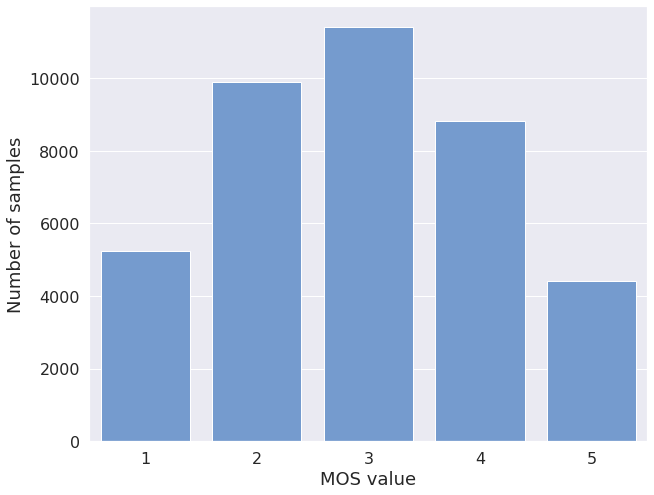

In [146]:
plt.figure(figsize=(10,8))
p = sns.countplot(data=df, x='MOS',palette=['#69d'])
p.set_xlabel("MOS value", fontsize=18)
p.set_ylabel("Number of samples", fontsize=18)
p.tick_params(labelsize=16)


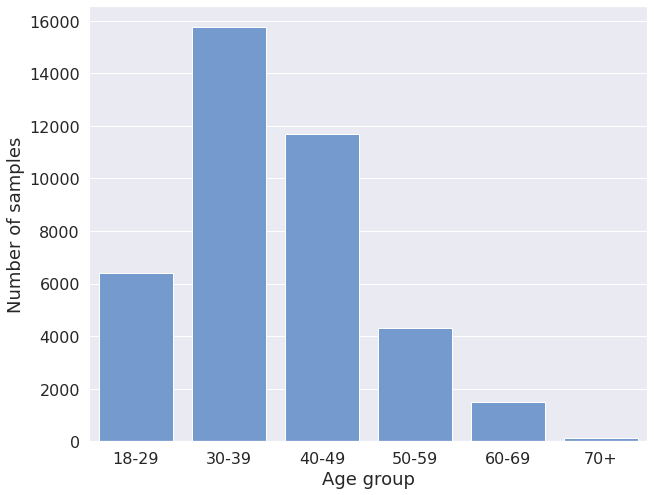

In [147]:
plt.figure(figsize=(10,8))
p=sns.countplot(data=df, x='age_group',order = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+'],palette=['#69d'])
p.set_xlabel("Age group", fontsize=18)
p.set_ylabel("Number of samples", fontsize=18)
p.tick_params(labelsize=16)


In [15]:
df['wav'].nunique()

4974

In [16]:
df_avg = df.copy()
df_avg.loc[df["age_group"]=='18-29','age_group'] = 25
df_avg.loc[df["age_group"]=='30-39','age_group'] = 35
df_avg.loc[df["age_group"]=='40-49','age_group'] = 45
df_avg.loc[df["age_group"]=='50-59','age_group'] = 55
df_avg.loc[df["age_group"]=='60-69','age_group'] = 65
df_avg.loc[df["age_group"]=='70+','age_group'] = 75
df_avg['age_group']= pd.to_numeric(df_avg['age_group'])

In [17]:
df_avg.head()

,system,wav,MOS,dummy,age_group,gender
0,sys64e2f,sys64e2f-utt9c183cd.wav,4,VDP1ovyrBzg8_1,35,Female
1,sys64e2f,sys64e2f-utt9c183cd.wav,4,VDP1ovyrBzg8_1,65,Female
2,sys64e2f,sys64e2f-utt9c183cd.wav,5,VDP1ovyrBzg8_1,25,Male
3,sys64e2f,sys64e2f-utt9c183cd.wav,5,VDP1ovyrBzg8_1,35,Male
4,sys64e2f,sys64e2f-utt9c183cd.wav,5,VDP1ovyrBzg8_1,35,Male


In [18]:
df_avg = df_avg.groupby(['wav'], as_index=False).agg({'MOS':['mean','std'],'age_group':['mean','std'],'gender':['count']})

In [19]:
df_avg=df_avg.droplevel(0, axis=1) 
df_avg.columns=['wav', 'MOS_mean', 'MOS_std', 'age_mean','age_std', 'count']


In [20]:
df_avg.head()

,wav,MOS_mean,MOS_std,age_mean,age_std,count
0,sys00691-utt00e6ae6.wav,3.375,1.060660,41.25,7.440238,8
1,sys00691-utt04097bc.wav,3.625,0.744024,41.25,7.440238,8
2,sys00691-utt0682e32.wav,3.375,0.744024,41.25,18.468119,8
3,sys00691-utt1524a0a.wav,2.625,0.916125,37.50,4.629100,8
4,sys00691-utt20b8d22.wav,3.125,0.640870,40.00,7.559289,8


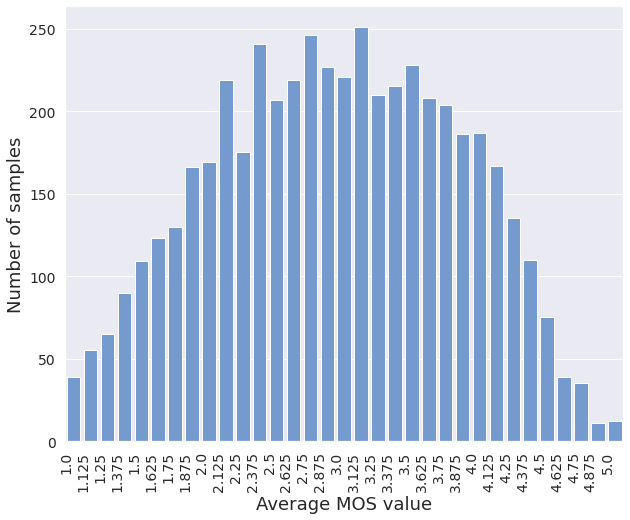

In [148]:
plt.figure(figsize=(10,8))
p = sns.countplot(data=df_avg, x='MOS_mean',palette=['#69d'])
p.set_xlabel("Average MOS value", fontsize=18)
p.set_ylabel("Number of samples", fontsize=18)
p.set_xticklabels(p.get_xticklabels(), rotation=90, horizontalalignment='right')
p.tick_params(labelsize=14)


In [168]:
len(df_avg[((df_avg.MOS_mean>=2) & (df_avg.MOS_mean<=4.125))])/len(df_avg)

0.7599517490952955

In [169]:
len(df_avg[((df_avg.MOS_mean<2))])/len(df_avg)

0.15621230398069963

In [170]:
len(df_avg[((df_avg.MOS_mean>4.125))])/len(df_avg)

0.08383594692400483

In [181]:
import numpy as np
np.std([1,1,2,3,3,4,5,5]), np.std([1,1,2,3,3,4,5,5]), np.std([1,1,1,3,4,5,5,5])

(1.5, 1.5, 1.7633419974582356)

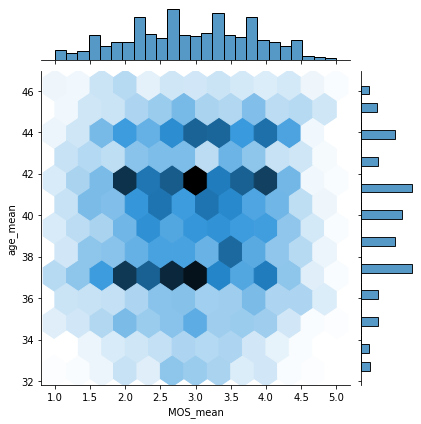

In [22]:
sns.jointplot(x='MOS_mean', y='age_mean', data=df_avg, kind='hex', joint_kws=dict(gridsize=12))

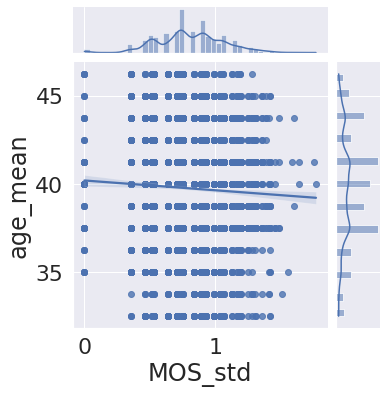

In [191]:
sns.jointplot(x='MOS_std', y='age_mean', data=df_avg, kind='reg', height=6)# joint_kws=dict(gridsize=12))

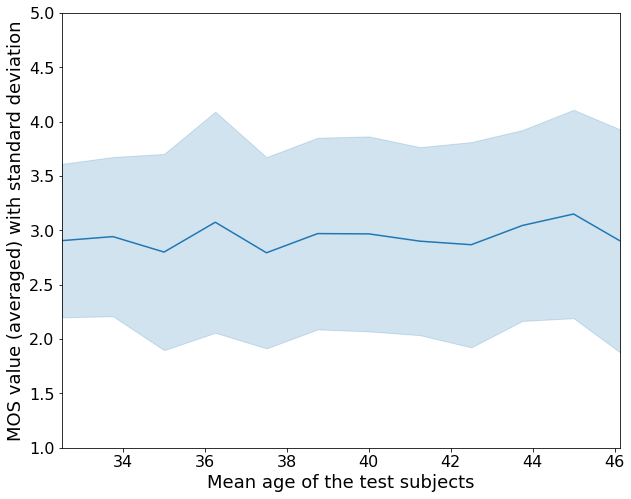

In [79]:
plt.figure(figsize=(10,8))
p = sns.lineplot(x='age_mean', y="MOS_mean",  data=df_avg, ci='sd', markers=True)
p.set_xlabel("Mean age of the test subjects", fontsize=18)
p.set_ylabel("MOS value (averaged) with standard deviation", fontsize=18)
p.set(xlim=(32.5,46.125))
p.set(ylim=(1,5))
p.tick_params(labelsize=16)


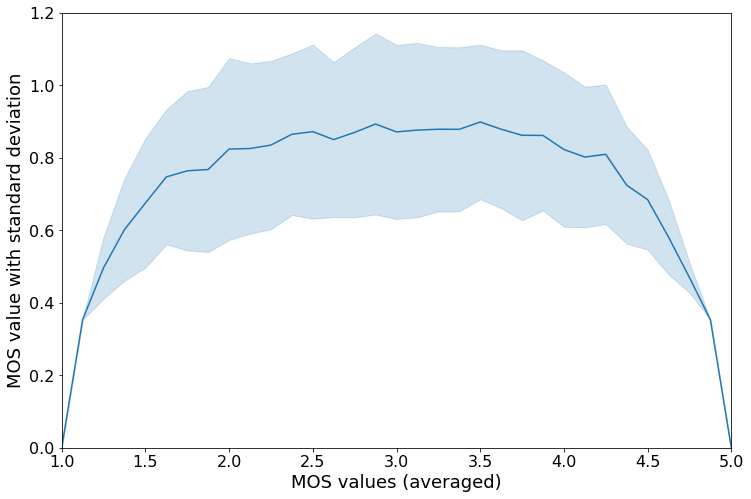

In [80]:
plt.figure(figsize=(12,8))
p = sns.lineplot(x='MOS_mean', y="MOS_std",  data=df_avg, ci='sd')
p.set_xlabel("MOS values (averaged)", fontsize=18)
p.set_ylabel("MOS value with standard deviation", fontsize=18)
p.set(xlim=(1,5))
p.set(ylim=(0,1.2))
p.tick_params(labelsize=16)



In [213]:
df_avg["MOS_std"].unique()

array([1.06066017, 0.74402381, 0.91612538, 0.64086994, 0.46291005,
       1.30247018, 0.83452296, 1.03509834, 1.16496475, 0.88640526,
       1.19522861, 0.99103121, 1.06066017, 1.35620268, 0.75592895,
       1.03509834, 0.70710678, 1.41421356, 0.46291005, 0.9258201 ,
       1.19522861, 0.51754917, 1.28173989, 0.35355339, 1.06904497,
       0.35355339, 0.91612538, 0.64086994, 0.99103121, 0.88640526,
       0.88640526, 0.53452248, 1.24642345, 0.99103121, 0.51754917,
       1.12599163, 0.53452248, 1.16496475, 1.38873015, 1.40788595,
       1.30930734, 0.53452248, 1.18773494, 0.53452248, 1.40788595,
       1.38873015, 1.50594062, 0.83452296, 1.41421356, 1.35620268,
       0.46291005, 0.9258201 , 0.        , 1.55264751, 1.45773797,
       1.28173989, 1.06904497, 1.75254916, 0.70710678, 1.30930734,
       1.76776695, 1.64208056, 1.48804762, 0.9258201 , 1.18773494,
       1.59798981, 1.60356745, 1.58113883])

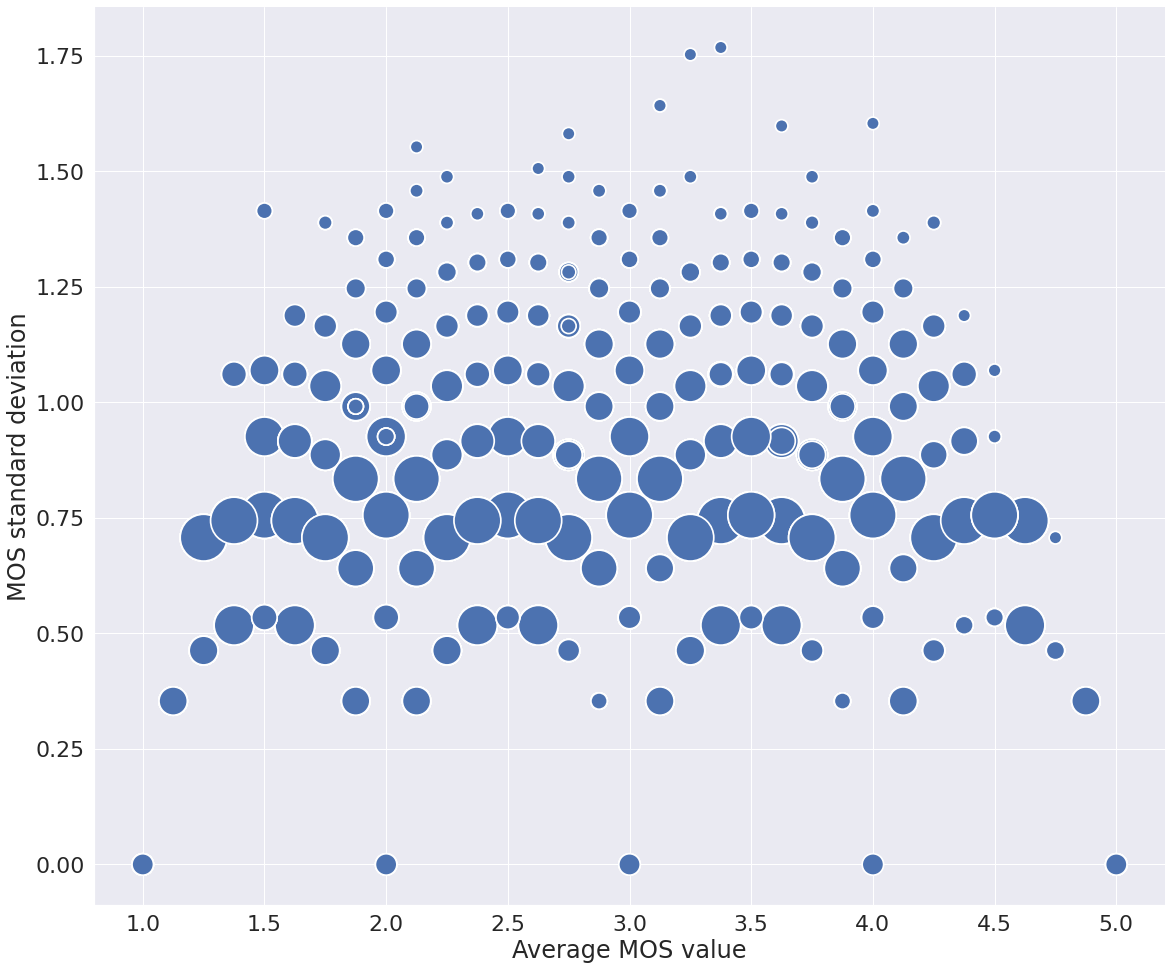

In [242]:
sns.set(font_scale = 2)
df_avg2=df_avg.copy()
#df_avg2['MOS_mean']=df_avg2["MOS_mean"]+np.random.normal(scale=0.02,size=len(df_avg2))
#df_avg2['MOS_std']=df_avg2["MOS_std"]+np.random.normal(scale=0.02,size=len(df_avg2))
df_avg2['count_std'] = 0
for mstd in df_avg2["MOS_std"].unique():

    df_avg2.loc[df_avg2["MOS_std"]==mstd,'count_std']=len(df_avg2[df_avg2["MOS_std"]==mstd])
df_avg2=df_avg2.rename(columns={"MOS_mean": "Average MOS value", "MOS_std": "MOS standard deviation"})
#p=sns.jointplot(x='Average MOS value', y='MOS standard deviation', data=df_avg2, kind='reg', scatter_kws={"s": 1}, height=14, ratio=10, xlim=(1,5)) # , joint_kws=dict(gridsize=10)
p=sns.relplot(x='Average MOS value', y='MOS standard deviation', size="count_std", aspect=1.2, data=df_avg2, sizes=(160,2200), height=14,legend=False)


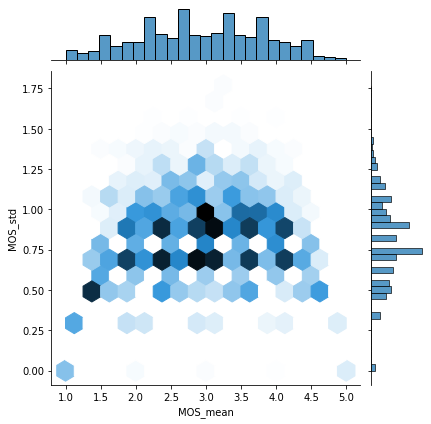

In [25]:
sns.jointplot(x='MOS_mean', y='MOS_std', data=df_avg, kind='hex', joint_kws=dict(gridsize=16))

<AxesSubplot:xlabel='MOS_mean', ylabel='MOS_std'>

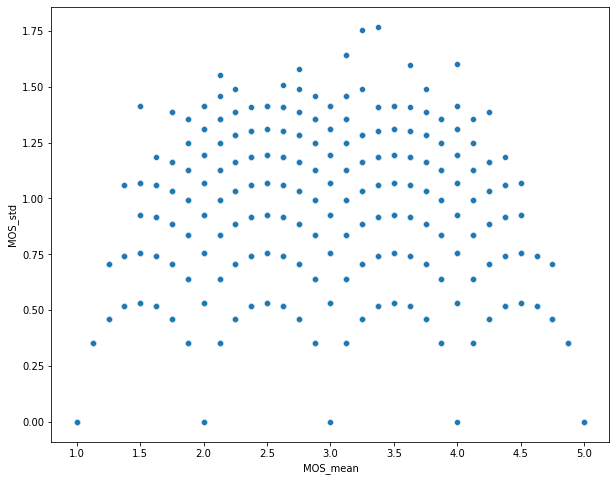

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.scatterplot(x='MOS_mean', y='MOS_std', data=df_avg)

## Generating TRAINSET and DEVSET files

In [15]:
train_mos_lookup={}
mos_list="train_mos_list.txt"
f = open(mos_list, 'r')
for line in f:
            parts = line.strip().split(',')
            wavename = parts[0]
            mos = float(parts[1])
            train_mos_lookup[wavename] = mos
val_mos_lookup={}
mos_list="val_mos_list.txt"
f = open(mos_list, 'r')
for line in f:
            parts = line.strip().split(',')
            wavename = parts[0]
            mos = float(parts[1])
            val_mos_lookup[wavename] = mos
                        

In [16]:
def store_wavename(sysdic,wavename,mos,age_group,gender):
    if wavename not in sysdic:
        sysdic[wavename]={}
        sysdic[wavename]['humans']=[]
    sysdic[wavename]['humans'].append((mos,age_group,gender))


def store_values(dic,sysname,wavename,mos,age_group,gender):
    if sysname not in dic:
        dic[sysname]={}
        dic[sysname]['waves']={}
    store_wavename(dic[sysname]['waves'],wavename,mos,age_group,gender)
    

In [17]:
TRAINSET=[]
filename="TRAINSET"
TRAIN={}
f = open(filename, 'r')
for line in f:
            parts = line.strip().split(',')
            sysname = parts[0]
            wavename = parts[1]
            mos = float(parts[2])
            unknown= parts[3]
            listener = parts[4].strip()
            lis_parts = listener.split('_')
            age_group=lis_parts[1]
            gender=lis_parts[3]
            if wavename not in TRAINSET:
                TRAINSET.append(wavename)
            store_values(TRAIN,sysname,wavename,mos,age_group,gender)
DEVSET=[]
filename="DEVSET"
DEV={}
f = open(filename, 'r')
for line in f:
            parts = line.strip().split(',')
            sysname = parts[0]
            wavename = parts[1]
            mos = float(parts[2])
            unknown= parts[3]
            listener = parts[4].strip()
            lis_parts = listener.split('_')
            age_group=lis_parts[1]
            gender=lis_parts[3]
            if wavename not in DEVSET:
                DEVSET.append(wavename)
            store_values(DEV,sysname,wavename,mos,age_group,gender)


In [4]:
#check train_mos_list
for name in train_mos_lookup.keys():
    if name not in TRAINSET:
            print("Missing: {}".format(name))
    else:
        sysname=name.split('-')[0]
        TRAIN[sysname]['waves'][name]['mos']=train_mos_lookup[name]
        
#check val_mos_list
for name in val_mos_lookup.keys():
    if name not in DEVSET:
            print("Missing: {}".format(name))
    else:
        sysname=name.split('-')[0]
        DEV[sysname]['waves'][name]['mos']=val_mos_lookup[name]
            

In [5]:
import math

def calc(dic):
    for sysname, value in dic.items():
        for wavename,wavedic in value['waves'].items():
            #print("wavename: {} MOS: {}".format(wavename,wavedic['mos']))
            min_value=5.0
            max_value=0.0
            dev_value=0.0
            average=wavedic['mos']
            num=0
                
            for mos,age_group,gender in wavedic['humans']:
                #print("{} {} {}".format(mos,age_group,gender))
                if mos<min_value: min_value=mos
                if mos>max_value: max_value=mos
                dev_value+=math.pow(mos-average,2)
                num+=1
            wavedic['min']=min_value
            wavedic['max']=max_value
            wavedic['dev']=math.sqrt(dev_value/num)
    #calc for systems:
    for sysname, value in dic.items():
        min_value=5.0
        max_value=0.0
        dev_value=0.0
        avg_value=0.0
        num=0
        for wavename,wavedic in value['waves'].items():
            mos=wavedic['mos']
            if mos<min_value: min_value=mos
            if mos>max_value: max_value=mos
            avg_value+=mos
            num+=1
        average=avg_value/num
        value['min']=min_value
        value['max']=max_value
        value['avg']=average
        for wavename,wavedic in value['waves'].items():
            mos=wavedic['mos']
            dev_value+=math.pow(mos-average,2)
        value['dev']=math.sqrt(dev_value/num)
        value['num']=num
            

In [6]:
calc(DEV)
calc(TRAIN)

In [7]:
print("DEV:")
for system,values in DEV.items():
    print("System: {} ({: 3})  Min: {:4.2f} Max:{:4.2f} Avg: {:4.2f} Dev: {:4.2f}".format(system,values['num'],values['min'],values['max'],values['avg'],values['dev'],))
print("TRAIN:")
for system,values in TRAIN.items():
    print("System: {} ({: 3})  Min: {:4.2f} Max:{:4.2f} Avg: {:4.2f} Dev: {:4.2f}".format(system,values['num'],values['min'],values['max'],values['avg'],values['dev'],))

DEV:
System: sys8d3e2 (  9)  Min: 1.12 Max:2.75 Avg: 1.79 Dev: 0.49
System: sys9dbae (  9)  Min: 1.12 Max:3.00 Avg: 2.14 Dev: 0.62
System: sysc382e (  9)  Min: 1.00 Max:1.50 Avg: 1.18 Dev: 0.17
System: sys520c6 ( 11)  Min: 1.25 Max:2.62 Avg: 2.07 Dev: 0.37
System: sys29328 ( 11)  Min: 1.38 Max:2.50 Avg: 1.82 Dev: 0.31
System: sys67c8d ( 11)  Min: 1.62 Max:3.88 Avg: 2.57 Dev: 0.61
System: sys35c79 ( 11)  Min: 1.50 Max:3.00 Avg: 2.25 Dev: 0.40
System: sysa0656 ( 11)  Min: 1.12 Max:2.38 Avg: 1.61 Dev: 0.40
System: sys50bf1 ( 10)  Min: 1.00 Max:2.12 Avg: 1.45 Dev: 0.41
System: sys8e2bf ( 10)  Min: 1.38 Max:3.50 Avg: 2.44 Dev: 0.55
System: sysbce79 (  9)  Min: 1.50 Max:3.00 Avg: 2.28 Dev: 0.47
System: sysf7f3d (  9)  Min: 1.75 Max:3.38 Avg: 2.49 Dev: 0.53
System: sys36d71 ( 10)  Min: 1.12 Max:2.38 Avg: 1.69 Dev: 0.36
System: sysc02df ( 11)  Min: 1.75 Max:4.00 Avg: 2.48 Dev: 0.66
System: sysd6a96 ( 11)  Min: 1.75 Max:3.62 Avg: 2.72 Dev: 0.58
System: sys50848 ( 11)  Min: 1.62 Max:3.00 Avg: 2.

In [8]:
good=[]
bad=[]

for sysname, value in TRAIN.items():
        for wavename,wavedic in value['waves'].items():
            #print("wavename: {} MOS: {}".format(wavename,wavedic['mos']))
            min_value=wavedic['min']
            max_value=wavedic['max']
            dev_value=wavedic['dev']
            average=wavedic['mos']
            if dev_value<1:
                good.append(wavename)
            else:
                bad.append(wavename)
print("BAD: {}".format(len(bad)))            
print("GOOD: {}".format(len(good)))            



BAD: 725
GOOD: 4249


In [10]:
filelist=[]
for sysname, value in TRAIN.items():
        for wavename,wavedic in value['waves'].items():
            filelist.append("wav/{}| \n".format(wavename))
for sysname, value in DEV.items():
        for wavename,wavedic in value['waves'].items():
            filelist.append("wav/{} \n".format(wavename))
f=open("filelist_all.txt","w")
f.writelines(filelist)
f.close()